# Full class QSVM

In [1]:
import numpy as np

from Qiskit.lib.QSVM import QSVM

In [2]:
# Example data array (M x N)
data_array = np.array([
        [1/np.sqrt(2), 1/np.sqrt(2),0], 
        [1/np.sqrt(2), 1/2,1/2],
        [1,0,0]
        ])

#data_array = np.array([
#        [1/np.sqrt(2), 1/np.sqrt(2)], 
#        [1, 0]
#        ])
y = np.array([1,1,-1])

v = np.array([1,2,3])
v = v/np.linalg.norm(v)

# Preprocess data
data_array = np.array([x/np.linalg.norm(x) for x in data_array])
print(data_array)

[[0.70710678 0.70710678 0.        ]
 [0.70710678 0.5        0.5       ]
 [1.         0.         0.        ]]


In [3]:
clf = QSVM()
clf.fit(data_array,y,t=1)

[0.05688535-8.29197822e-15j 0.08960536+1.43288159e-15j
 0.08960536+1.54390389e-15j 0.01172449-9.86710713e-15j]


In [4]:
clf.predict(v)

1

## Non-normalized vectors in the dataset

In [5]:
# Example data array (M x N)
data_array = np.array([
        [1, 1,0], 
        [1, 1,1],
        [1,0,0]
        ])

#data_array = np.array([
#        [1/np.sqrt(2), 1/np.sqrt(2)], 
#        [1, 0]
#        ])
y = np.array([1,1,-1])

v = np.array([1,2,3])
v = v/np.linalg.norm(v)

# Preprocess data
#data_array = np.array([x/np.linalg.norm(x) for x in data_array])
print(data_array)

[[1 1 0]
 [1 1 1]
 [1 0 0]]


In [6]:
clf = QSVM(n_l=5,info=True)
clf.fit(data_array,y,t=1)

       ┌──────────────┐┌──────┐        ┌─────────┐
q10_0: ┤0             ├┤5     ├────────┤5        ├
       │  circuit-266 ││      │        │         │
q10_1: ┤1             ├┤6     ├────────┤6        ├
       └──────────────┘│      │┌──────┐│         │
q11_0: ────────────────┤0     ├┤4     ├┤0        ├
                       │      ││      ││         │
q11_1: ────────────────┤1 QPE ├┤3     ├┤1 QPE_dg ├
                       │      ││      ││         │
q11_2: ────────────────┤2     ├┤2     ├┤2        ├
                       │      ││  1/x ││         │
q11_3: ────────────────┤3     ├┤1     ├┤3        ├
                       │      ││      ││         │
q11_4: ────────────────┤4     ├┤0     ├┤4        ├
                       └──────┘│      │└─────────┘
  q12: ────────────────────────┤5     ├───────────
                               └──────┘           
Solution's fidelity:  0.9740633704378548
[-0.00900145+4.08551773e-15j  0.32957407-1.27068495e-14j
  0.25526593-1.82718424e-14j -0.491

In [7]:
clf.predict(v)

1

## "Non-quantum" sizes of the datasets

In [8]:
# Example data array (M x N)
data_array = np.array([
        [1, 0], 
        [1, 1],
        ])

#data_array = np.array([
#        [1/np.sqrt(2), 1/np.sqrt(2)], 
#        [1, 0]
#        ])
y = np.array([1,-1])

v = np.array([1,3])
v = v/np.linalg.norm(v)

# Preprocess data
#data_array = np.array([x/np.linalg.norm(x) for x in data_array])
print(data_array)

[[1 0]
 [1 1]]


In [11]:
clf = QSVM(info=True)
clf.fit(data_array, y)

       ┌──────────────┐┌──────┐        ┌─────────┐
q15_0: ┤0             ├┤2     ├────────┤2        ├
       │  circuit-449 ││      │        │         │
q15_1: ┤1             ├┤3     ├────────┤3        ├
       └──────────────┘│  QPE │┌──────┐│  QPE_dg │
q16_0: ────────────────┤0     ├┤1     ├┤0        ├
                       │      ││      ││         │
q16_1: ────────────────┤1     ├┤0 1/x ├┤1        ├
                       └──────┘│      │└─────────┘
  q17: ────────────────────────┤2     ├───────────
                               └──────┘           
Solution's fidelity:  0.8221471611539656
[-0.01147641-4.16902840e-16j  0.03412538-3.46944695e-17j
 -0.07062967-1.17961196e-16j  0.00037862-6.18212079e-16j]


# OLD

In [1]:
import numpy as np

In [2]:
def obligacje_rownowaga(i,t,p,m,b):
    return(((1+p)*np.power((1+i+m),t-1)-1)*(1-b) - (np.power(1+i,t)-1))

In [25]:
b=0.19

t_EDO = 10
m_EDO = 0.02
p_EDO = 0.0655

t_ROD = 12
m_ROD = 0.025
p_ROD = 0.068

In [16]:
obligacje_rownowaga(0.098,t_EDO,p_EDO,m_EDO,b)

-0.001838462004263075

In [23]:
obligacje_rownowaga(0.037,10,0.017,0.01,b)

-0.0026455039090394483

In [35]:
obligacje_rownowaga(0.141,t_ROD,p_ROD,m_ROD,b)

0.006466524956541875

In [1]:
import pennylane as qml
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [2]:
def array_2_vector(a):
    return(a.reshape([a.shape[0]*a.shape[1],]))

## Training

## Classification

In [3]:
dev = qml.device('default.qubit', wires=2)

In [4]:
b=0.5
alphas = np.array([0.1,0.2,0.0])

w = np.concatenate([np.array([b]),alphas])

In [5]:
w_normalized = w/np.linalg.norm(w)

In [6]:
np.dot(w_normalized, w_normalized)

0.9999999999999999

In [7]:
@qml.qnode(dev)
def hyperplane_state_setup(b,alphas):
    w = np.concatenate([np.array([b]),alphas])
    w_normalized = w/np.linalg.norm(w)

    #qml.AmplitudeEmbedding(features=[1,0,0,0], wires=range(2))
    return qml.state()

In [8]:
N= 4
M = 3
n_features = int(np.ceil(np.log2(N)))
n_data = int(np.ceil(np.log2(M)))
print('n_features: ', n_features)
print('n_data: ', n_data)

dev_features = qml.device('default.qubit', wires=n_features)
dev_data = qml.device('default.qubit', wires=n_data)
dev = qml.device('default.qubit', wires=n_data+n_features)

n_features:  2
n_data:  2


In [9]:
np.concatenate( ([0], x ) )

NameError: name 'x' is not defined

In [10]:
@qml.qnode(dev_features)
def training_data_oracle(x):
    x = np.concatenate(([0], x))
    x = x/np.linalg.norm(x) #normalize, just in case
    n_wires = int(np.ceil(np.log2(len(x))))
    qml.AmplitudeEmbedding(features=x, wires=range(n_wires))
    return qml.state()

In [11]:
@qml.qnode(dev)
def training_dataset_oracle(X):
    X = np.vstack((np.zeros((1,X.shape[1])),X))
    x = array_2_vector(X)
    x = x/np.linalg.norm(x) #normalize, just in case
    n_wires = int(np.ceil(np.log2(len(x))))
    qml.AmplitudeEmbedding(features=x, wires=range(n_wires))
    return qml.state()

In [12]:
x = np.array([0.1,0.2,0.3])
x = x/np.linalg.norm(x)

In [13]:
Mstr = np.array([['a','b'],['c','d']])
Mstr.reshape([Mstr.shape[0]*Mstr.shape[1],])

M = np.array([[1,2],[3,4],[5,6]])

In [14]:
training_data_oracle(x)

tensor([0.        +0.j, 0.26726124+0.j, 0.53452248+0.j, 0.80178373+0.j], requires_grad=True)

In [15]:
training_dataset_oracle(M)

tensor([0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.10482848+0.j, 0.        +0.j, 0.20965697+0.j, 0.        +0.j,
        0.31448545+0.j, 0.        +0.j, 0.41931393+0.j, 0.        +0.j,
        0.52414242+0.j, 0.        +0.j, 0.6289709 +0.j, 0.        +0.j], requires_grad=True)

## SWAP test

In [30]:
def fake_SWAP_test(state_1_features, state_2_features):
    state0 = qml.math.dm_from_state_vector(state_1_features)
    state1 = qml.math.dm_from_state_vector(state_2_features)
    return 0.5*(1-qml.math.fidelity(state0, state1))

In [28]:
state0 = qml.math.dm_from_state_vector([1, 0])
state1 = qml.math.dm_from_state_vector([0,1])
qml.math.fidelity(state0, state1)

0.0

In [55]:
n_states=3
a1 = np.arange(1,n_states+1,1)
print(a1)
a2 = np.arange(n_states+1,2*n_states+1,1)
print(a2)

[1 2 3]
[4 5 6]


In [50]:

for i in range(1,n_states+1):
    print(i)

print('----')
for i in range(n_states+1, 2*n_states+1):
    print(i)

    

1
2
3
----
4
5
6


In [31]:
dev_swap = qml.device('default.qubit', wires=3)

In [32]:
dev_swap = qml.device('default.qubit', wires=3)

@qml.transforms.merge_amplitude_embedding
@qml.qnode(dev_swap)
def SWAP_TEST_1_qubit(state_1_features, state_2_features):
    qml.AmplitudeEmbedding(features=state_1_features, wires=[1])
    qml.AmplitudeEmbedding(features=state_2_features, wires=[2])
    qml.Hadamard(wires=[0])
    qml.CSWAP(wires=[0,1,2])
    qml.Hadamard(wires=[0])

    #return(qml.state())
    return(qml.probs(wires=[0]))

In [42]:
a = np.random.random()
b = np.random.random()

s_1 = np.array([a,np.sqrt(1-a**2)])
s_2 = np.array([b,np.sqrt(1-b**2)])

print(fake_SWAP_test(s_1,s_2))
print(SWAP_TEST_1_qubit(s_1,s_2)[1])

0.0023839105929697735
0.00238391430936892


In [25]:
s_1 = np.array([1/np.sqrt(2),1/np.sqrt(2)])
s_2 = np.array([1/np.sqrt(2),1/np.sqrt(2)])

np.around(2*SWAP_TEST_1_qubit(s_1,s_2)[0]-1,decimals=4)

1.0

## Amplitude embedding on wires

We have a device with $n$ wires. We would like to amplitude encode the $s$-qubit state on the the selected subset of wires, $\{n_1,n_2,\dots,n_s\}$

In [33]:
dev = qml.device('default.qubit', wires=4)

In [34]:
@qml.transforms.merge_amplitude_embedding
@qml.qnode(device=dev)
def circuit():
    qml.CNOT(wires = [0,1])
    qml.AmplitudeEmbedding([0,1], wires = 2)
    qml.AmplitudeEmbedding([0,1], wires = 3)
    return qml.state()

ValueError: QNodes cannot be declared as qfunc transforms.

## State solution

In [3]:
import numpy as np

In [4]:
def gram_schmidt(vectors):
    """Apply Gram-Schmidt process to a set of vectors."""
    orthonormal_basis = []
    for v in vectors:
        # Subtract projections of v onto all previously found basis vectors
        for b in orthonormal_basis:
            v = v - np.dot(b, v) * b
        # Normalize the vector
        v = v / np.linalg.norm(v)
        orthonormal_basis.append(v)
    return np.array(orthonormal_basis)

def construct_unitary(first_col):
    """Construct a unitary matrix with a given normalized vector as the first column."""
    # Ensure the first column is normalized
    first_col = first_col / np.linalg.norm(first_col)
    
    # Get the dimension of the vector space (N)
    N = len(first_col)
    
    # Create an identity matrix as the starting point for other vectors
    # These will serve as the basis to which we apply Gram-Schmidt
    identity_matrix = np.eye(N)
    
    # Remove the first column from the identity matrix as we already have the first column
    remaining_cols = identity_matrix[:, 1:]
    
    # Apply Gram-Schmidt process to orthogonalize the rest of the columns
    full_matrix = np.column_stack((first_col, remaining_cols))
    orthonormal_matrix = gram_schmidt(full_matrix.T).T  # Ensure columns are orthogonalized
    
    return orthonormal_matrix

In [5]:
import numpy as np

def block_matrix_IU(U):
    """Create block matrix [[I, 0], [0, U]] where I is an identity matrix of size U.shape[0]."""
    N = U.shape[0]  # Size of the unitary matrix U
    I = np.eye(N)   # Identity matrix of size N
    
    # Create the block matrix [[I, 0], [0, U]]
    top_block = np.hstack((I, np.zeros((N, N))))
    bottom_block = np.hstack((np.zeros((N, N)), U))
    block_matrix = np.vstack((top_block, bottom_block))
    
    return block_matrix

def block_matrix_UI(U):
    """Create block matrix [[U, 0], [0, I]] where I is an identity matrix of size U.shape[0]."""
    N = U.shape[0]  # Size of the unitary matrix U
    I = np.eye(N)   # Identity matrix of size N
    
    # Create the block matrix [[U, 0], [0, I]]
    top_block = np.hstack((U, np.zeros((N, N))))
    bottom_block = np.hstack((np.zeros((N, N)), I))
    block_matrix = np.vstack((top_block, bottom_block))
    
    return block_matrix

In [6]:
# Example usage
first_col = np.array([0.8, 0.6])  # Example normalized vector
unitary_matrix = construct_unitary(first_col)
print("Unitary matrix:")
print(unitary_matrix)

Unitary matrix:
[[ 0.8 -0.6]
 [ 0.6  0.8]]


In [7]:
# Example usage
U = np.array([[0.8, -0.6], [0.6, 0.8]])  # Example 2x2 unitary matrix

# Create block matrices
block_IU = block_matrix_IU(U)
block_UI = block_matrix_UI(U)

# Print the results
print("Block matrix [[I, 0], [0, U]]:")
print(block_IU)

print("\nBlock matrix [[U, 0], [0, I]]:")
print(block_UI)

Block matrix [[I, 0], [0, U]]:
[[ 1.   0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   0.8 -0.6]
 [ 0.   0.   0.6  0.8]]

Block matrix [[U, 0], [0, I]]:
[[ 0.8 -0.6  0.   0. ]
 [ 0.6  0.8  0.   0. ]
 [ 0.   0.   1.   0. ]
 [ 0.   0.   0.   1. ]]


In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import UnitaryGate

In [16]:
n=1
# Define expected states for the superposition of the system
v_1 = np.ones((2**n,))
v_1 = v_1/np.linalg.norm(v_1)
print('v_1: ', v_1)

v_2 = np.zeros((2**n,))
v_2[-1] = 1
v_2[0] = 2
v_2 = v_2/np.linalg.norm(v_2)
print('v_2: ', v_2)

v_1:  [0.70710678 0.70710678]
v_2:  [0.89442719 0.4472136 ]


In [17]:
U_1_m = construct_unitary(v_1)
CU_1_m = block_matrix_UI(U_1_m)

U_2_m = construct_unitary(v_2)
CU_2_m = block_matrix_UI(U_2_m)

In [19]:
CU_1 = UnitaryGate(CU_1_m)
CU_2 = UnitaryGate(CU_2_m)

[0.632+0.j 0.316+0.j 0.5  +0.j 0.5  +0.j]


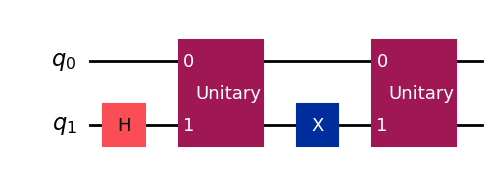

In [35]:
qc = QuantumCircuit(n+1)
qc.h(1)
qc.append(CU_1,[0,1])
qc.x(1)
qc.append(CU_2,[0,1])
print(np.around(Statevector(qc),decimals=3))
qc.draw('mpl')

In [38]:
v_2[1]/np.sqrt(2)

0.3162277660168379

In [13]:
qc.append(CU_1, [0,1])

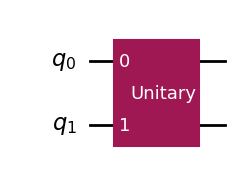

In [14]:
qc.draw('mpl')

In [5]:
# Verify unitarity: U * U† = I
print("Check unitarity (U * U†):")
print(np.allclose(np.eye(len(first_col)), unitary_matrix @ unitary_matrix.T.conj()))

Check unitarity (U * U†):
True


In [6]:
v = np.array([1,1])
v = v/np.linalg.norm(v)
U = construct_unitary(v)

In [7]:
U

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [40]:
from Qiskit.lib.controlled_initialization import controlled_initialization_matrix
import numpy as np

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import UnitaryGate

In [41]:
n=1
# Define expected states for the superposition of the system
v_1 = np.ones((2**n,))
v_1 = v_1/np.linalg.norm(v_1)
print('v_1: ', v_1)

v_2 = np.zeros((2**n,))
v_2[-1] = 1
v_2[0] = 2
v_2 = v_2/np.linalg.norm(v_2)
print('v_2: ', v_2)

v_1:  [0.70710678 0.70710678]
v_2:  [0.89442719 0.4472136 ]


In [56]:
CU_1_m = controlled_initialization_matrix(v_1)
CU_2_m = controlled_initialization_matrix(v_2)

CU_1 = UnitaryGate(CU_1_m, label=r'$U_{\tilde{u}}$')
CU_2 = UnitaryGate(CU_2_m, label=r'$U_{\tilde{x}}$')

[ 0.801+0.j  0.577+0.j -0.094+0.j  0.13 +0.j]


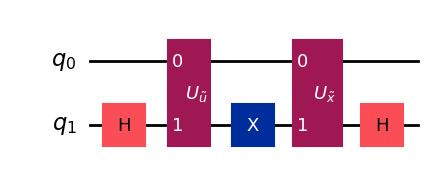

In [57]:
qc = QuantumCircuit(n+1)
qc.h(1)
qc.append(CU_1,[0,1])
qc.x(1)
qc.append(CU_2,[0,1])
qc.h(1)
print(np.around(Statevector(qc),decimals=3))
qc.draw('mpl')

In [58]:
list(range(5))

[0, 1, 2, 3, 4]

In [61]:
def msb_probability(statevector):
    """Calculate the probability that the most significant bit is 1."""
    # Get the number of qubits from the size of the statevector
    num_qubits = int(np.log2(len(statevector)))

    # Initialize the probability sum for MSB = 1
    probability_msb_1 = 0.0

    # Iterate over the basis states
    for index, amplitude in enumerate(statevector):
        # Convert the index to its binary representation with num_qubits bits
        binary_state = format(index, f'0{num_qubits}b')
        
        # Check if the most significant bit (MSB) is 1
        if binary_state[0] == '1':  # MSB is the first bit in the binary string
            probability_msb_1 += np.abs(amplitude) ** 2  # Add the probability amplitude

    return probability_msb_1

# Example usage
# Create a Statevector |ψ⟩ (for example, an equal superposition state of 2 qubits)
#initial_state = Statevector.from_label('00') + Statevector.from_label('01') + Statevector.from_label('10') + Statevector.from_label('11')
#print(initial_state)
#initial_state = initial_state.normalize()  # Normalize the statevector

v = np.array([1,1,1,1])
v = v/np.linalg.norm(v)
initial_state = Statevector(v)

# Calculate the probability that the MSB is 1
prob_msb_1 = msb_probability(initial_state)
print(f"Probability that the most significant bit is 1: {prob_msb_1}")

Probability that the most significant bit is 1: 0.5


In [63]:
initial_state.probabilities()

array([0.25, 0.25, 0.25, 0.25])

In [65]:
for index, amplitude in enumerate(initial_state):
    print(index, amplitude)
    binary_state = format(index, f'0{2}b')
    print(binary_state)

0 (0.5+0j)
00
1 (0.5+0j)
01
2 (0.5+0j)
10
3 (0.5+0j)
11


In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
P=0.95
step=0.01
P_x = np.arange(0,1,step, dtype=float)

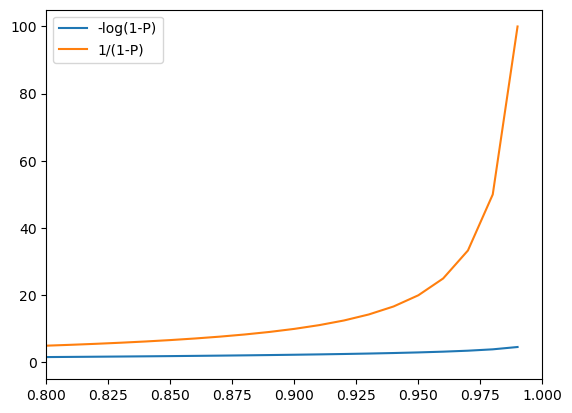

In [46]:
plt.plot(P_x, -np.log(1-P_x), label='-log(1-P)')
plt.plot(P_x, 1/(1-P_x), label='1/(1-P)')

plt.xlim((0.8,1))

plt.legend()
plt.show()

In [53]:
C_k = 10
C_D = 1
n_x = np.arange(1,60)
alpha_k = 0.3
alpha_D = 0.2
print(alpha_k/alpha_D)

1.4999999999999998


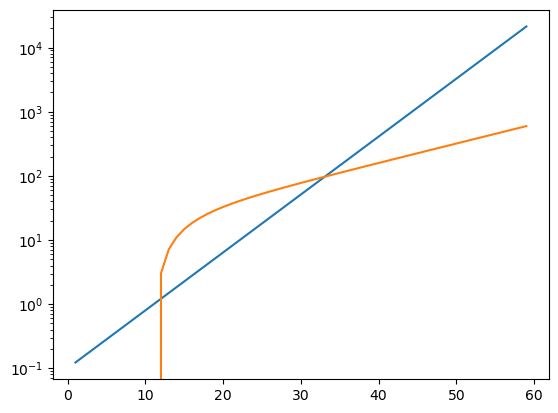

In [54]:
plt.plot(n_x, 1/C_k*np.power(2,alpha_k*n_x))
plt.plot(n_x, C_k/C_D*np.power(2,n_x*(2*alpha_D-alpha_k))*(1-C_k*np.power(2,-alpha_k*n_x))-1)


plt.yscale('log')
plt.show()

/var/folders/pz/rn2xqvpd1rj6nvf70v0hgm3h0000gp/T/ipykernel_37478/2673661391.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(n_x, -1/np.log(1-np.power(2,-n_x.astype(np.float32))))


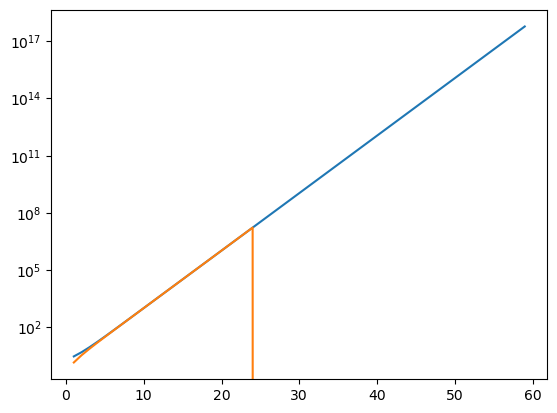

In [62]:
plt.plot(n_x, np.power(2,n_x)*(1+np.power(2,-n_x.astype(np.float32))))
plt.plot(n_x, -1/np.log(1-np.power(2,-n_x.astype(np.float32))))

plt.yscale('log')
plt.show()

In [50]:
n_x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [69]:
from scipy.stats import beta

In [70]:
x = np.arange(0,1,0.01)

In [121]:
n=2

alpha_alpha = -1.0
alpha_beta = -2.0

a = np.power(2,1*alpha_alpha)
b = np.power(2,1*alpha_beta)

In [122]:
def a(n, aplha_alpha):
    return(np.power(2,n*alpha_alpha))

def b(n, aplha_beta):
    return(np.power(2,n*aplha_beta))

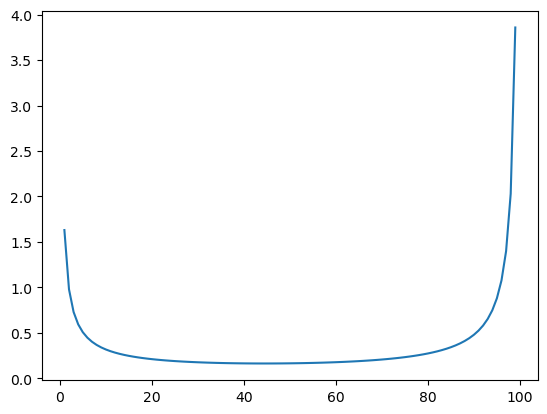

In [123]:
plt.plot(beta.pdf(x, a(2,alpha_alpha), b(2,alpha_beta)))
plt.show()

In [124]:
[beta.mean(a(n,alpha_alpha), b(n,alpha_beta))/beta.var(a(n,alpha_alpha), b(n,alpha_beta)) for n in range(30)]

[6.0,
 5.25,
 6.5625,
 10.265625,
 18.12890625,
 34.0634765625,
 66.031494140625,
 130.01568603515625,
 258.00782775878906,
 514.0039100646973,
 1026.0019540786743,
 2050.0009768009186,
 4098.000488340855,
 8194.000244155526,
 16386.000122074038,
 32770.00006103609,
 65538.00003051781,
 131074.00001525885,
 262146.00000762945,
 524290.0000038147,
 1048578.0000019073,
 2097154.0000009537,
 4194306.000000477,
 8388610.000000238,
 16777218.00000012,
 33554434.00000006,
 67108866.00000003,
 134217729.99999997,
 268435458.0,
 536870914.0]

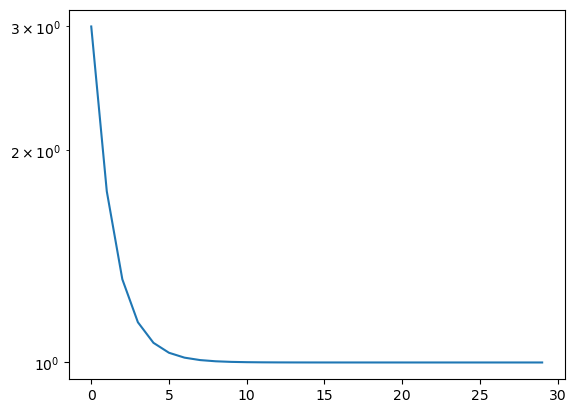

In [125]:
plt.plot([(beta.mean(a(n,alpha_alpha), b(n,alpha_beta))*(1-beta.mean(a(n,alpha_alpha), b(n,alpha_beta))))/beta.var(a(n,alpha_alpha), b(n,alpha_beta)) for n in range(30)])
plt.yscale('log')
plt.show()

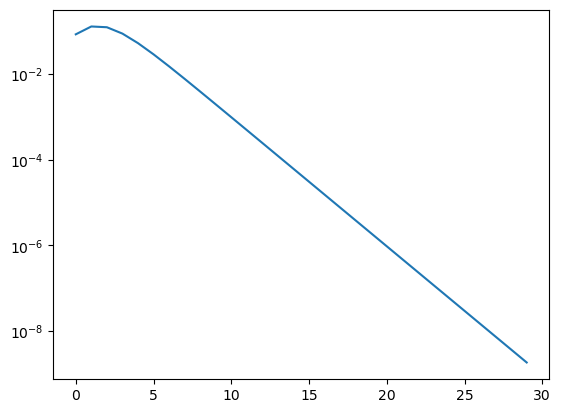

In [128]:
plt.plot([beta.var(a(n,alpha_alpha), b(n,alpha_beta)) for n in range(30)])
plt.yscale('log')

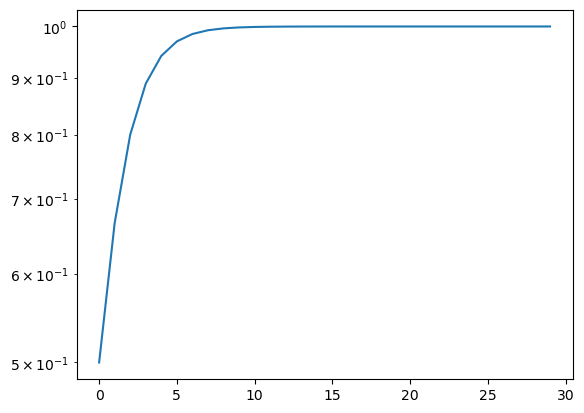

In [129]:
plt.plot([beta.mean(a(n,alpha_alpha), b(n,alpha_beta)) for n in range(30)])
plt.yscale('log')